#### Carregando a base de dados

In [2]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_credit_data.pkl', mode = 'rb') as arquivo:
    p_treinamento, c_treinamento, p_teste, c_teste = pickle.load( arquivo )

In [3]:
p_treinamento.shape, c_treinamento.shape

((1500, 3), (1500,))

In [4]:
p_teste.shape, c_teste.shape

((500, 3), (500,))

#### Aplicação do aprendizado

In [5]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(random_state=1)
modelo.fit(p_treinamento, c_treinamento)

LogisticRegression(random_state=1)

In [8]:
from sklearn.metrics import accuracy_score

previsao = modelo.predict(p_teste)

print(f'Precisão do modelo: {accuracy_score(c_teste, previsao)*100:.2f}%')

Precisão do modelo: 94.60%


#### Visualizando resultados do modelo

In [9]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import xlabel, ylabel

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "0", 423 previsões estão corretas e 13 estão incorretas.**

<br>

**Para a classe "1", 50 previsões estão corretas e 14 estão incorretas.**

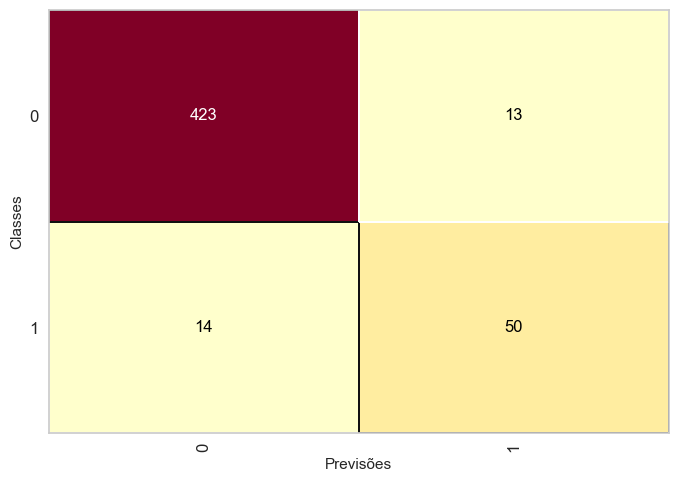

In [10]:
cm = ConfusionMatrix(modelo)
cm.fit(p_treinamento, c_treinamento)
cm.score(p_teste, c_teste)

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [12]:
print(classification_report( c_teste, previsao ))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500

